In [9]:
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import networkx as nx

<h2><center>Graph Layer

Define the graph layer as a Pytorch Module:

In [10]:
class GraphLayer(nn.Module):
    def __init__(self,adjacency_matrix,input_size,output_size):
        super(GraphLayer,self).__init__()
        
        self.A = adjacency_matrix
        self.Ahat = self.A + np.eye(len(self.A))
        self.D = np.sum(self.A,axis=0)
        self.Dhat = np.diag(1/np.sqrt(np.sum(self.Ahat,axis=0)))
        self.M = torch.tensor(self.Dhat@self.Ahat@self.Dhat).float()
        self.W = nn.Parameter(torch.randn(input_size,output_size,requires_grad=True).float())
        
    def forward(self,X):
        # X has dimensions (batch_size,node_index,data)
        return self.M @ X @ self.W

### Defining the models:

Model 1

In [11]:
class gcn_1(nn.Module):
    def __init__(self, adjacency_matrix):
        super(gcn_1,self).__init__()
        
        self.adjacency_matrix = adjacency_matrix
        self.graphlayer1 = GraphLayer(adjacency_matrix,len(adjacency_matrix),5)
        self.graphlayer2 = GraphLayer(adjacency_matrix,5,3)
        self.graphlayer3 = GraphLayer(adjacency_matrix,3,2)
        self.graphlayer4 = GraphLayer(adjacency_matrix,2,3)
        
    def forward(self,X):
        X = torch.tanh(self.graphlayer1(X))
        X = torch.tanh(self.graphlayer2(X))
        X_embedding = torch.tanh(self.graphlayer3(X))
        X = F.softmax(self.graphlayer4(X_embedding), dim=2)
        return X, X_embedding
        


Model 2

In [12]:
class gcn_2(nn.Module):
    def __init__(self, adjacency_matrix):
        super(gcn_2,self).__init__()
        
        self.adjacency_matrix = adjacency_matrix
        self.graphlayer1 = GraphLayer(adjacency_matrix,len(adjacency_matrix),5)
        self.graphlayer2 = GraphLayer(adjacency_matrix,5,3)
        self.graphlayer3 = GraphLayer(adjacency_matrix,3,2)
        self.graphlayer4 = GraphLayer(adjacency_matrix,2,3)
        self.graphlayer5 = GraphLayer(adjacency_matrix,3,3)
        
    def forward(self,X):
        X = torch.tanh(self.graphlayer1(X))
        X = torch.tanh(self.graphlayer2(X))
        X_embedding = torch.tanh(self.graphlayer3(X))
        X = torch.tanh(self.graphlayer4(X_embedding))
        X = F.softmax(self.graphlayer5(X), dim=2)
        return X, X_embedding

Model 3

In [13]:
class gcn_3(nn.Module):
    def __init__(self, adjacency_matrix):
        super(gcn_3,self).__init__()
        
        self.adjacency_matrix = adjacency_matrix
        self.graphlayer1 = GraphLayer(adjacency_matrix,len(adjacency_matrix),5)
        self.graphlayer2 = GraphLayer(adjacency_matrix,5,5)
        self.graphlayer3 = GraphLayer(adjacency_matrix,5,5)
        self.graphlayer4 = GraphLayer(adjacency_matrix,5,2)
        self.graphlayer5 = GraphLayer(adjacency_matrix,2,3)
        self.graphlayer6 = GraphLayer(adjacency_matrix,3,3)
        
    def forward(self,X):
        X = torch.tanh(self.graphlayer1(X))
        X = torch.tanh(self.graphlayer2(X))
        X = torch.tanh(self.graphlayer3(X))
        X_embedding = torch.tanh(self.graphlayer4(X))
        X = torch.tanh(self.graphlayer5(X_embedding))
        X = F.softmax(self.graphlayer6(X), dim=2)
        return X, X_embedding

Model 4

In [14]:
class gcn_4(nn.Module):
    def __init__(self, adjacency_matrix):
        super(gcn_4,self).__init__()
        
        self.adjacency_matrix = adjacency_matrix
        self.graphlayer1 = GraphLayer(adjacency_matrix,len(adjacency_matrix),8)
        self.graphlayer2 = GraphLayer(adjacency_matrix,8,8)
        self.graphlayer3 = GraphLayer(adjacency_matrix,8,5)
        self.graphlayer4 = GraphLayer(adjacency_matrix,5,2)
        self.graphlayer5 = GraphLayer(adjacency_matrix,2,3)
        self.graphlayer6 = GraphLayer(adjacency_matrix,3,3)
        
    def forward(self,X):
        X = torch.tanh(self.graphlayer1(X))
        X = torch.tanh(self.graphlayer2(X))
        X = torch.tanh(self.graphlayer3(X))
        X_embedding = torch.tanh(self.graphlayer4(X))
        X = torch.tanh(self.graphlayer5(X_embedding))
        X = F.softmax(self.graphlayer6(X), dim=2)
        return X, X_embedding

Get the Karate Club dataset:

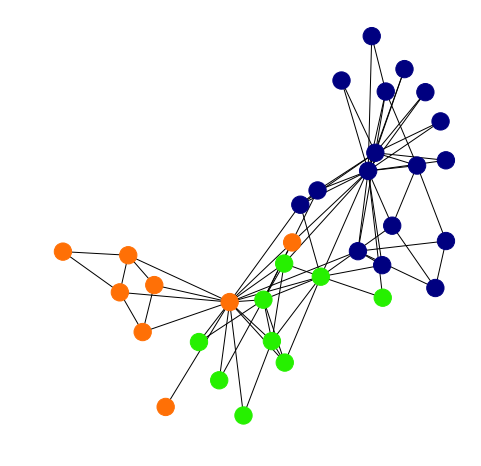

In [15]:
def map_community_colors(communities,colormap):
    cs = plt.get_cmap(colormap)
    community_colors = []
    
    for n in range(len(graph.nodes)):
        community = None
        for k,com in enumerate(communities):
            if n in com:
                community = k            
        community_colors.append(cs(community/len(communities)))
    return community_colors


graph = nx.karate_club_graph()
communities = nx.algorithms.community.modularity_max.greedy_modularity_communities(graph)
community_colors = map_community_colors(communities=communities, colormap="gist_ncar")
adjacency_matrix = nx.adjacency_matrix(graph).toarray()

#Plot graph
plt.figure(figsize=(6,6))
nx.draw_spring(graph,node_color=community_colors)
plt.show()

Now let's get the output embeddings of the model when we input a feature matrix X as an identity matrix. 

In [8]:
model = gcn_4(adjacency_matrix)

X = torch.tensor([np.eye(len(adjacency_matrix))],requires_grad=False).float()
output, output_2D_embedding = model(X) 

Function that plots the embeddings:

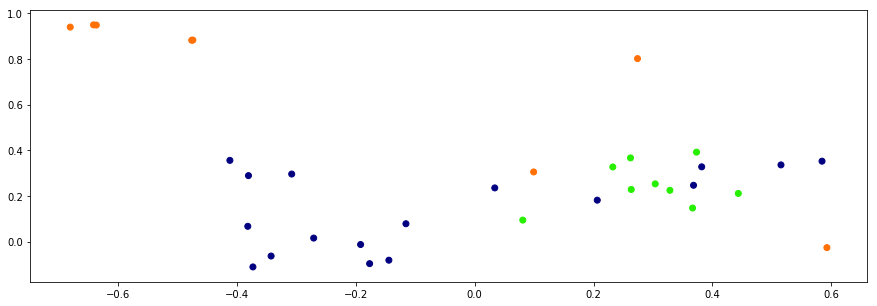

In [9]:
def plot_embeddings_2D(output_2D_embedding):
    
    plotOutput = output_2D_embedding.detach().numpy()[0]
    x = [plotOutput[i][0] for i in range(len(plotOutput))]
    y = [plotOutput[i][1] for i in range(len(plotOutput))]

    plt.figure(figsize=(15,5))
    plt.scatter(x,y,c=community_colors)
    plt.show()
    
plot_embeddings_2D(output_2D_embedding)

<IPython.core.display.Javascript object>


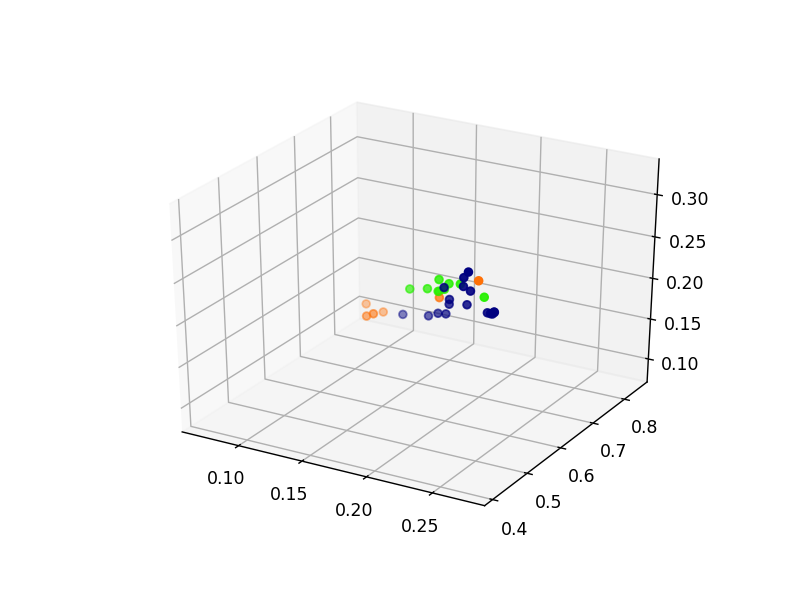

In [10]:
output = output.detach().numpy()
def plot_embeddings_3D(output):
    %matplotlib notebook
    fig = plt.figure()
    ax = fig.gca(projection='3d')
    ax.scatter(output[0, :, 0], output[0, :, 1], output[0, :, 2], c=community_colors)
plot_embeddings_3D(output)

    

In [11]:
#Turn off interative matplotlib view
%matplotlib inline

Sometimes, the output of this 3-layer GCN produces a clean separation of the data. This is because the GCN pass resembles the Weisfeiler-Lehman algorithm.

<h2><center> Training the GCN

Firstly, let's choose 3 nodes from the graph to have labels in order to train the model in a semi-supervised setting. We will choose 3 random nodes corresponding to the 3 different possible classes.

In [12]:
#First let's get a vector y, with the label of all the nodes
n_classes = 3
n_nodes = 34
y = torch.zeros(n_nodes).long()
y_arg_rand = torch.zeros(n_classes).long()
y_rand_nodes = torch.arange(n_classes).long().unsqueeze(0) #y has dimension (batch_size, N_nodes)


for i in range(n_classes):
    for j in communities[i]:
        y[j]=i
        
#Select 3 random nodes and their corresponding labels
counter = 0
for i in range(n_classes):  
    counter = 0    
    for j in communities[i]:
        if torch.rand(1)[0] > 0.9:
            y_arg_rand[i]=j
            break
        counter += 1
        if counter == len(communities[i])-1:
            y_arg_rand[i]=j 
        
    


node_set = "%d, %d, %d" %(y_arg_rand[0].item(), y_arg_rand[1].item(), y_arg_rand[2].item())
print('Random selected nodes for classes [0,1,2]:', node_set)


Random selected nodes for classes [0,1,2]: 33, 17, 16


Here we train the chosen model and plot the embeddings at the embedding layer at some epochs. The colors of the nodes in the embeddings correspond to the real classes of each node (not the predicted ones).

Epoch no: 0


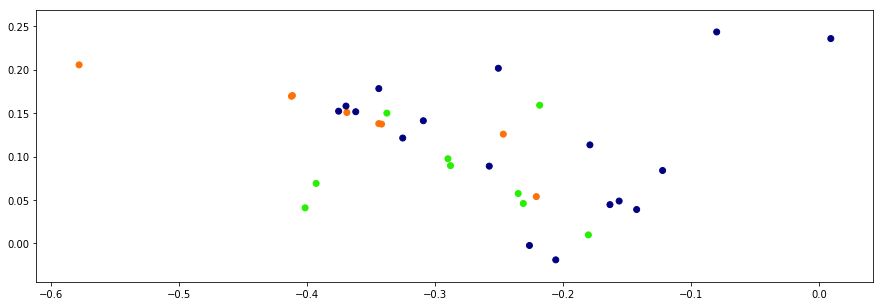

Predictions for the selected training nodes | real values: tensor([[0, 1, 0]]) | [0,1,2]
Number of correct predictions = 15
Epoch no: 200


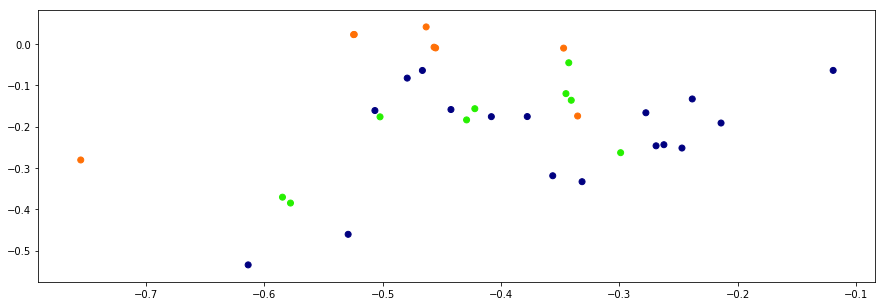

Predictions for the selected training nodes | real values: tensor([[0, 1, 2]]) | [0,1,2]
Number of correct predictions = 17
Epoch no: 400


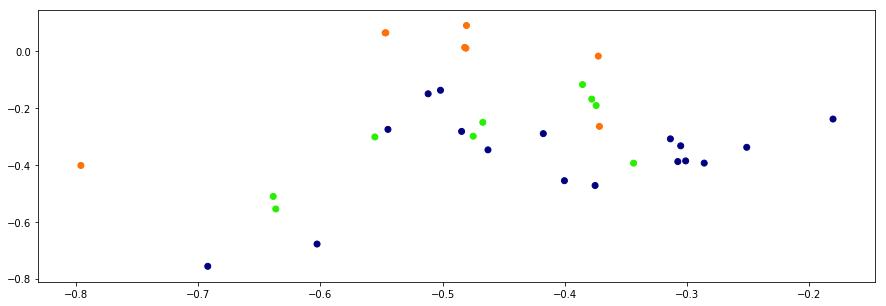

Predictions for the selected training nodes | real values: tensor([[0, 1, 2]]) | [0,1,2]
Number of correct predictions = 17
Epoch no: 600


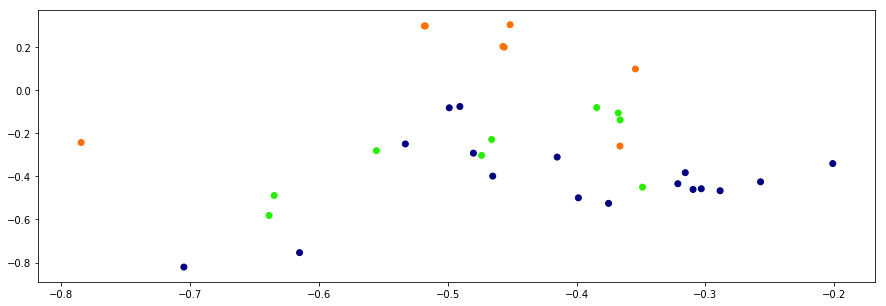

Predictions for the selected training nodes | real values: tensor([[0, 2, 2]]) | [0,1,2]
Number of correct predictions = 17
Epoch no: 800


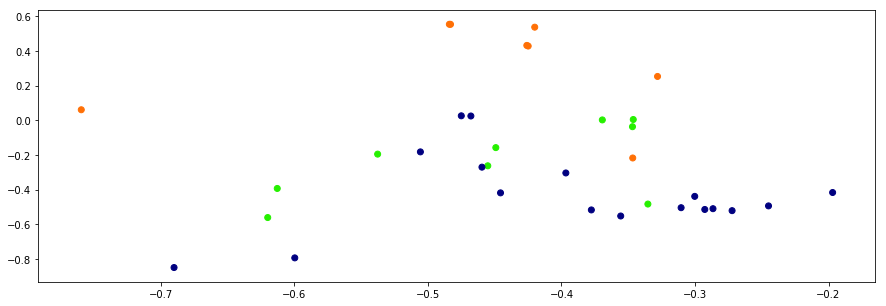

Predictions for the selected training nodes | real values: tensor([[0, 2, 2]]) | [0,1,2]
Number of correct predictions = 22
Epoch no: 1000


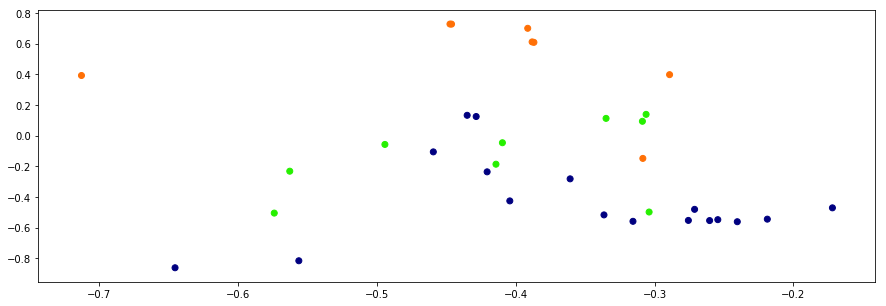

Predictions for the selected training nodes | real values: tensor([[0, 2, 2]]) | [0,1,2]
Number of correct predictions = 23
Epoch no: 1200


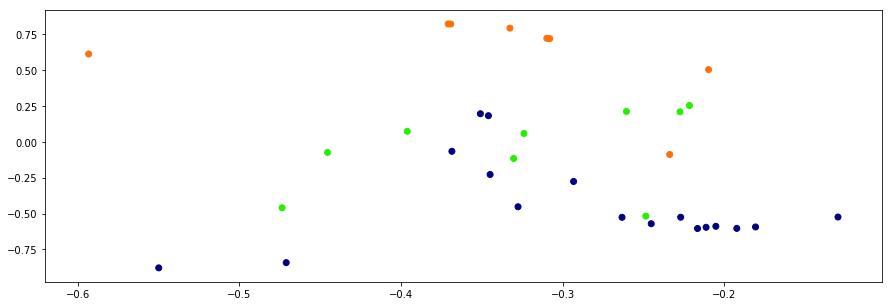

Predictions for the selected training nodes | real values: tensor([[0, 1, 2]]) | [0,1,2]
Number of correct predictions = 24
Epoch no: 1400


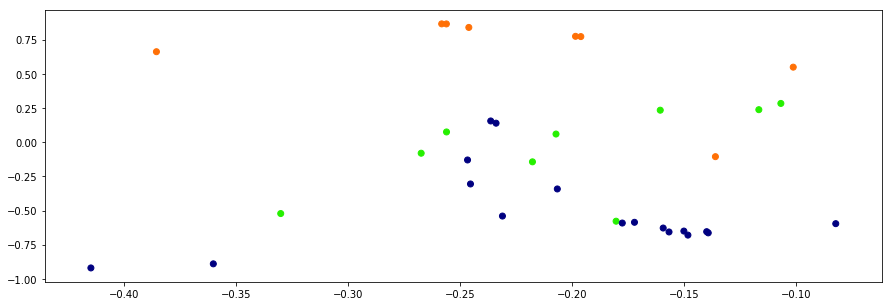

Predictions for the selected training nodes | real values: tensor([[0, 1, 2]]) | [0,1,2]
Number of correct predictions = 24
Epoch no: 1600


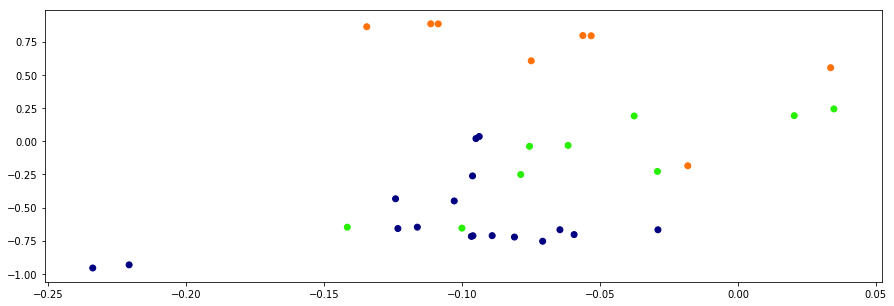

Predictions for the selected training nodes | real values: tensor([[0, 1, 2]]) | [0,1,2]
Number of correct predictions = 24
Epoch no: 1800


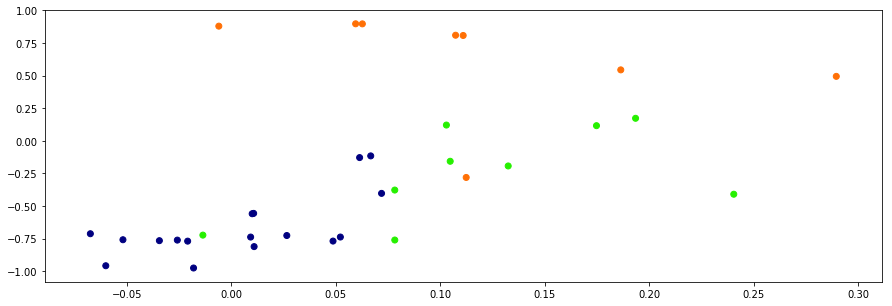

Predictions for the selected training nodes | real values: tensor([[0, 1, 2]]) | [0,1,2]
Number of correct predictions = 27
Epoch no: 2000


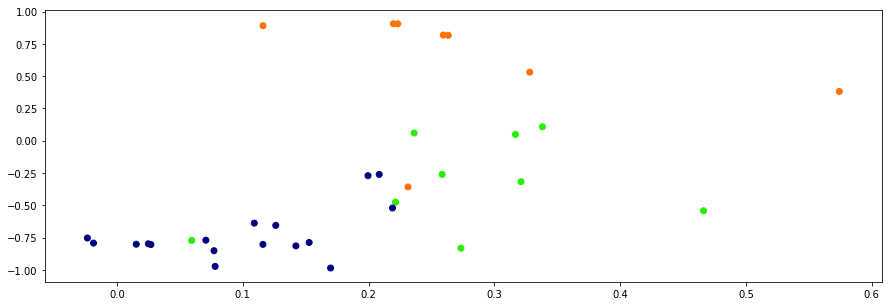

Predictions for the selected training nodes | real values: tensor([[0, 1, 2]]) | [0,1,2]
Number of correct predictions = 27
Epoch no: 2200


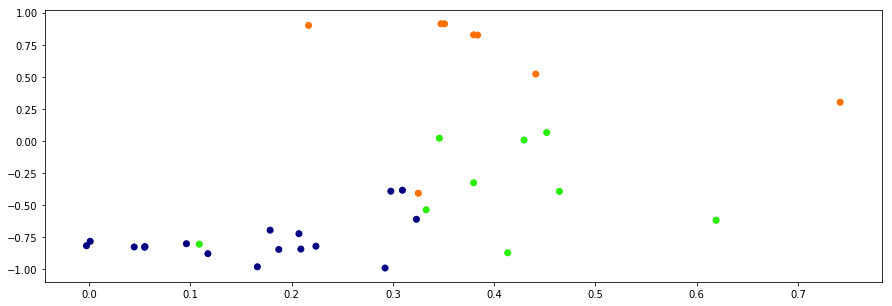

Predictions for the selected training nodes | real values: tensor([[0, 1, 2]]) | [0,1,2]
Number of correct predictions = 29
Epoch no: 2400


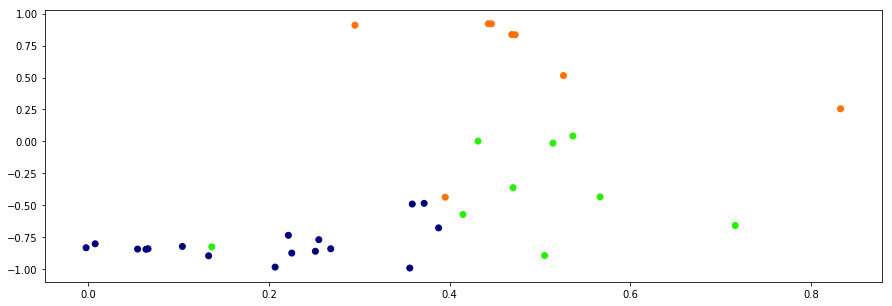

Predictions for the selected training nodes | real values: tensor([[0, 1, 2]]) | [0,1,2]
Number of correct predictions = 29
Epoch no: 2600


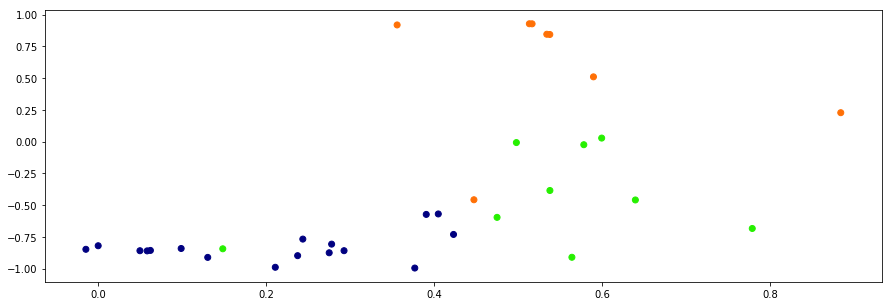

Predictions for the selected training nodes | real values: tensor([[0, 1, 2]]) | [0,1,2]
Number of correct predictions = 30
Epoch no: 2800


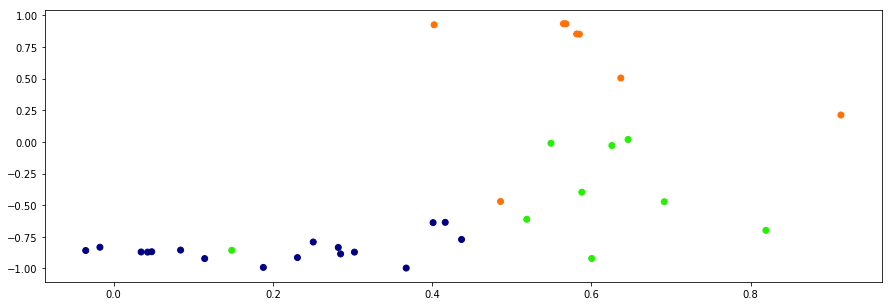

Predictions for the selected training nodes | real values: tensor([[0, 1, 2]]) | [0,1,2]
Number of correct predictions = 29
Epoch no: 3000


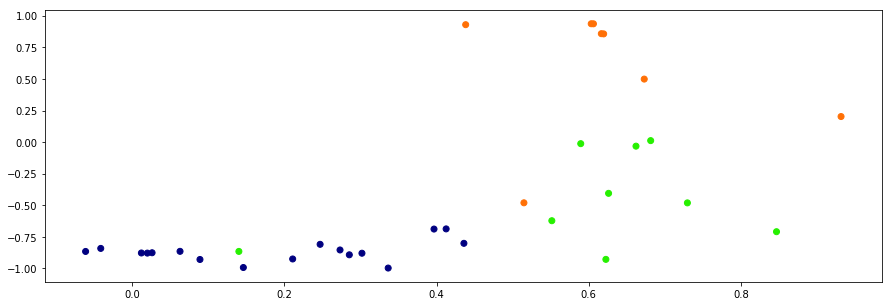

Predictions for the selected training nodes | real values: tensor([[0, 1, 2]]) | [0,1,2]
Number of correct predictions = 29
Epoch no: 3200


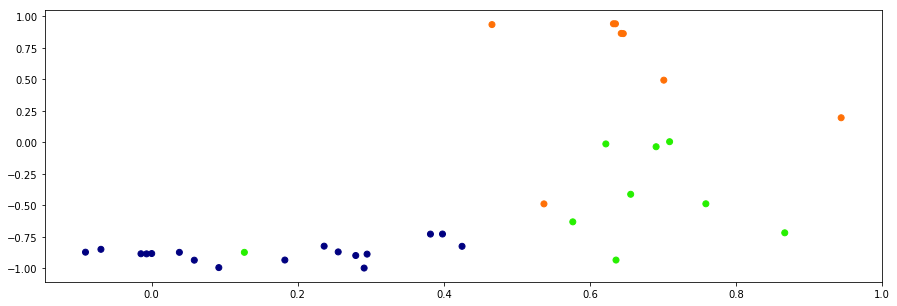

Predictions for the selected training nodes | real values: tensor([[0, 1, 2]]) | [0,1,2]
Number of correct predictions = 29
Epoch no: 3400


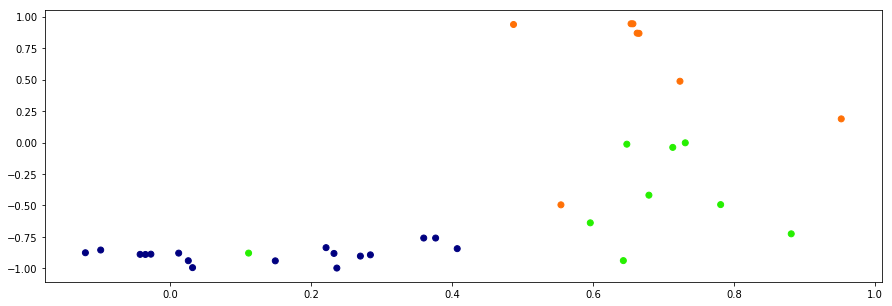

Predictions for the selected training nodes | real values: tensor([[0, 1, 2]]) | [0,1,2]
Number of correct predictions = 29
Epoch no: 3600


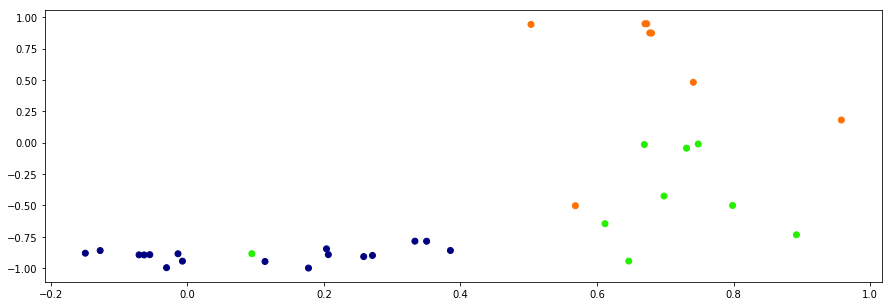

Predictions for the selected training nodes | real values: tensor([[0, 1, 2]]) | [0,1,2]
Number of correct predictions = 29
Epoch no: 3800


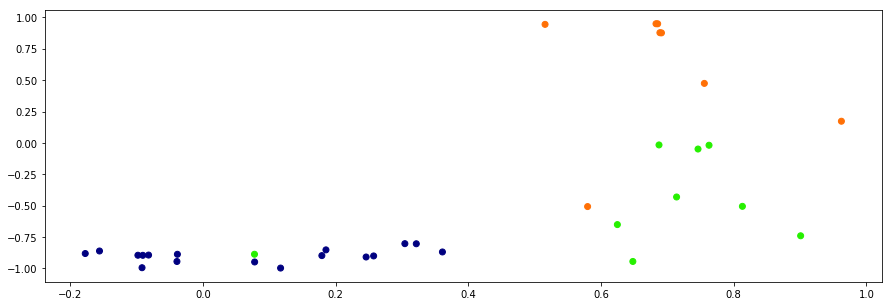

Predictions for the selected training nodes | real values: tensor([[0, 1, 2]]) | [0,1,2]
Number of correct predictions = 29
Epoch no: 4000


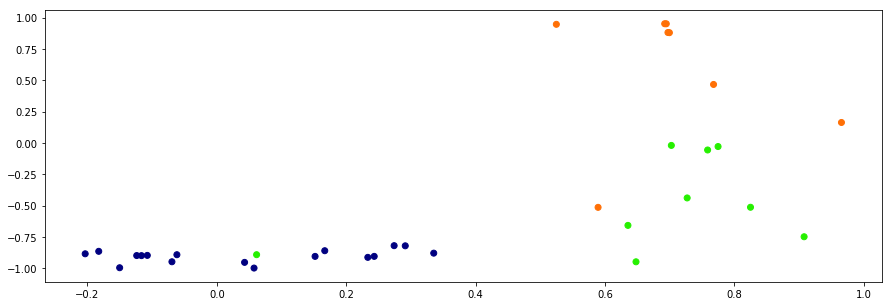

Predictions for the selected training nodes | real values: tensor([[0, 1, 2]]) | [0,1,2]
Number of correct predictions = 29
Epoch no: 4200


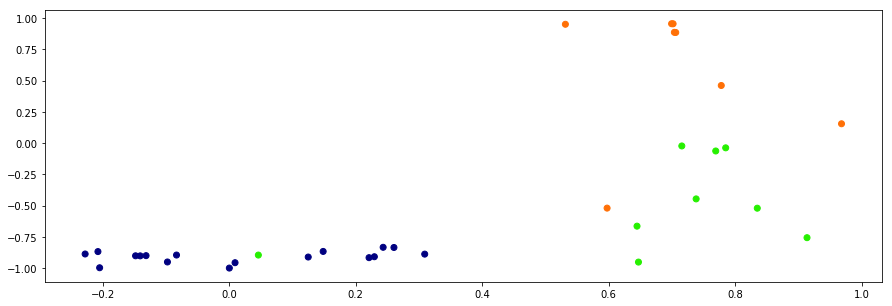

Predictions for the selected training nodes | real values: tensor([[0, 1, 2]]) | [0,1,2]
Number of correct predictions = 29
Epoch no: 4400


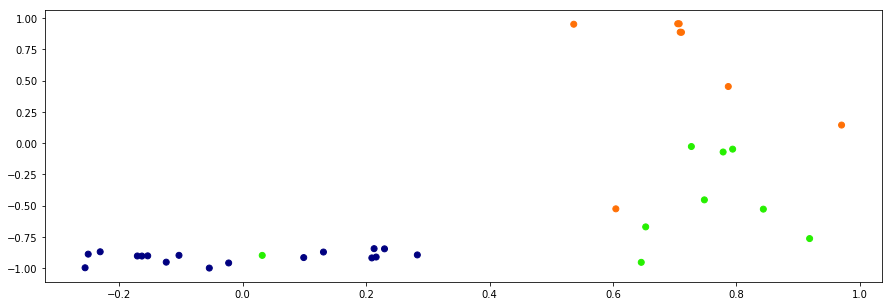

Predictions for the selected training nodes | real values: tensor([[0, 1, 2]]) | [0,1,2]
Number of correct predictions = 30
Epoch no: 4600


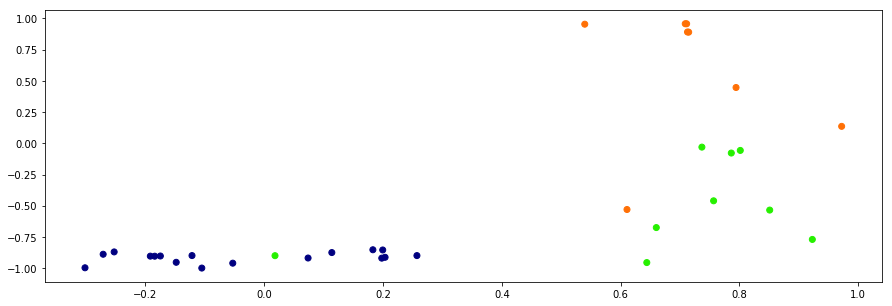

Predictions for the selected training nodes | real values: tensor([[0, 1, 2]]) | [0,1,2]
Number of correct predictions = 30
Epoch no: 4800


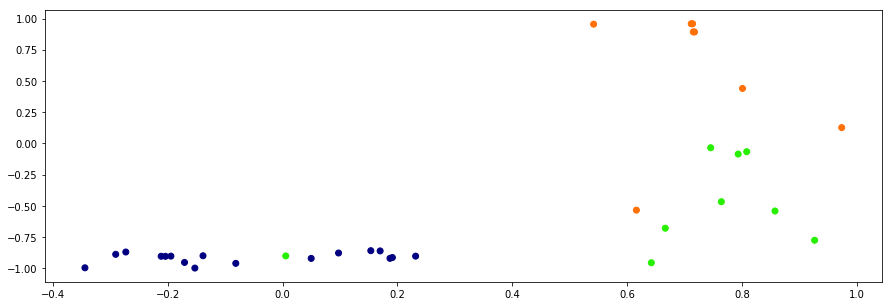

Predictions for the selected training nodes | real values: tensor([[0, 1, 2]]) | [0,1,2]
Number of correct predictions = 30
Epoch no: 5000


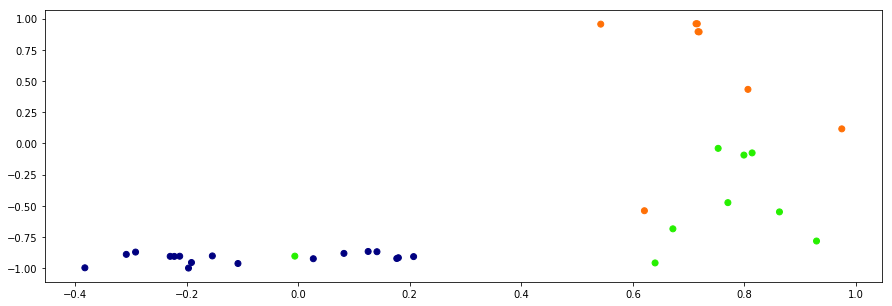

Predictions for the selected training nodes | real values: tensor([[0, 1, 2]]) | [0,1,2]
Number of correct predictions = 30
Epoch no: 5200


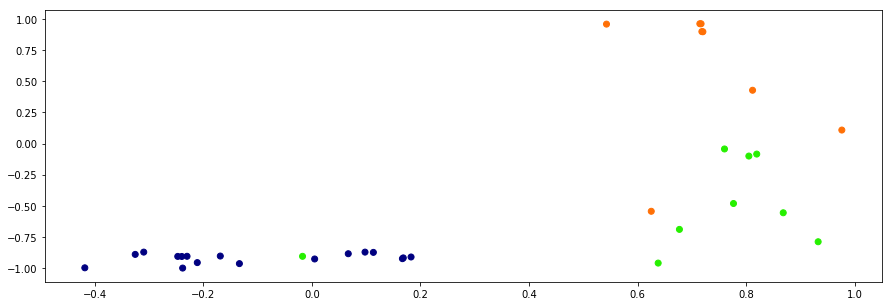

Predictions for the selected training nodes | real values: tensor([[0, 1, 2]]) | [0,1,2]
Number of correct predictions = 30
Epoch no: 5400


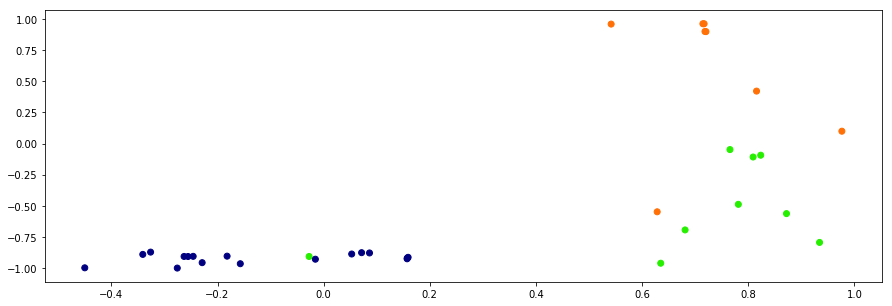

Predictions for the selected training nodes | real values: tensor([[0, 1, 2]]) | [0,1,2]
Number of correct predictions = 30
Epoch no: 5600


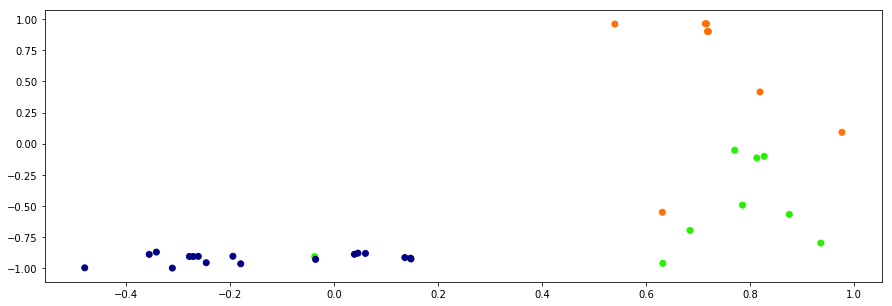

Predictions for the selected training nodes | real values: tensor([[0, 1, 2]]) | [0,1,2]
Number of correct predictions = 30
Epoch no: 5800


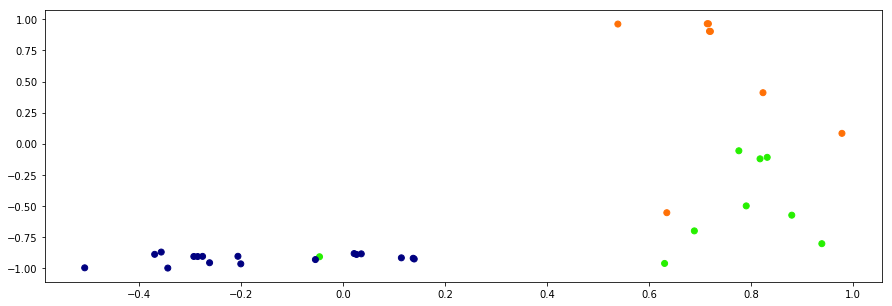

Predictions for the selected training nodes | real values: tensor([[0, 1, 2]]) | [0,1,2]
Number of correct predictions = 30
Epoch no: 6000


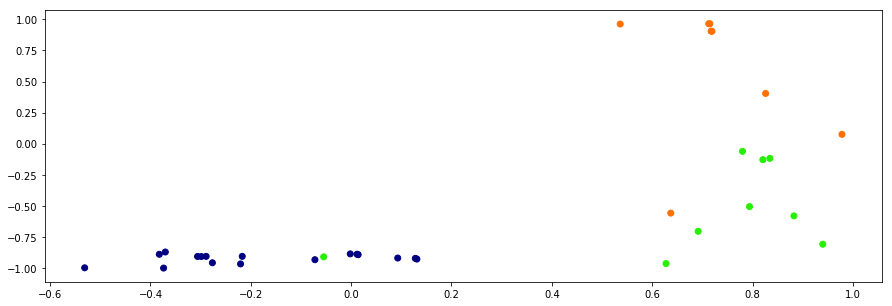

Predictions for the selected training nodes | real values: tensor([[0, 1, 2]]) | [0,1,2]
Number of correct predictions = 30
Epoch no: 6200


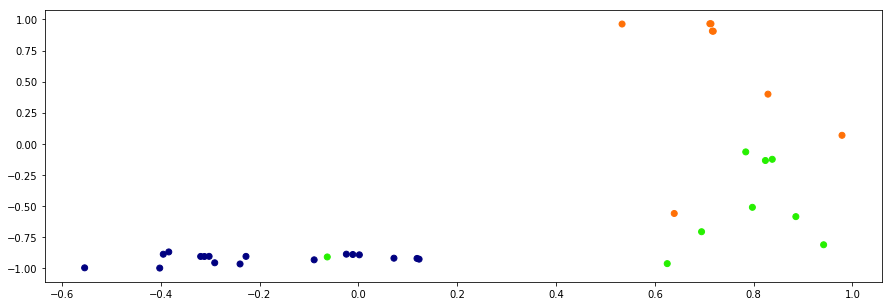

Predictions for the selected training nodes | real values: tensor([[0, 1, 2]]) | [0,1,2]
Number of correct predictions = 30
Epoch no: 6400


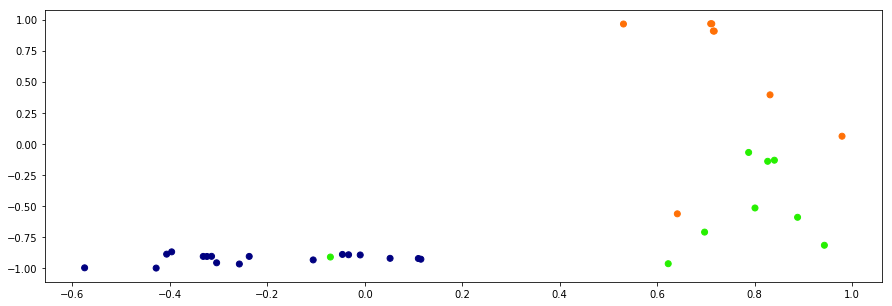

Predictions for the selected training nodes | real values: tensor([[0, 1, 2]]) | [0,1,2]
Number of correct predictions = 30
Epoch no: 6600


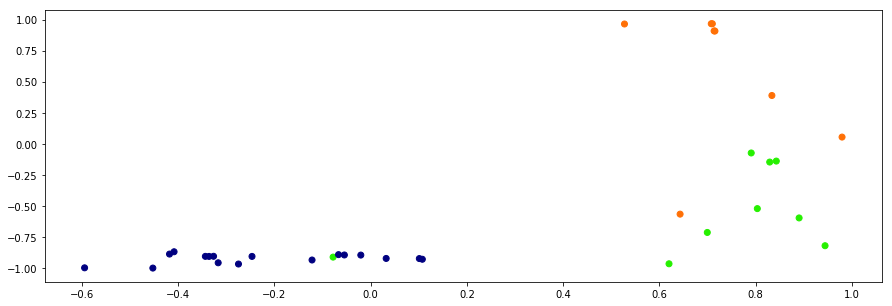

Predictions for the selected training nodes | real values: tensor([[0, 1, 2]]) | [0,1,2]
Number of correct predictions = 30
Epoch no: 6800


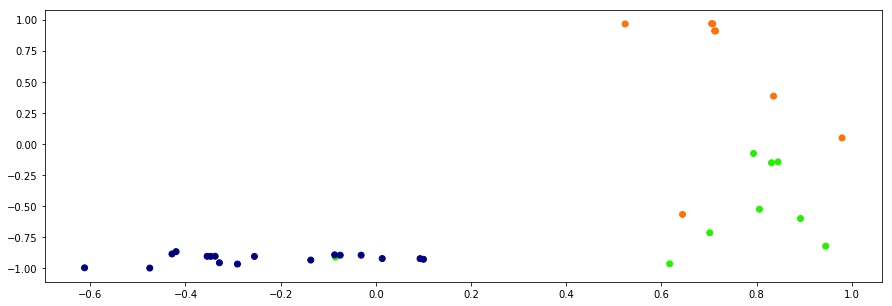

Predictions for the selected training nodes | real values: tensor([[0, 1, 2]]) | [0,1,2]
Number of correct predictions = 30
Epoch no: 7000


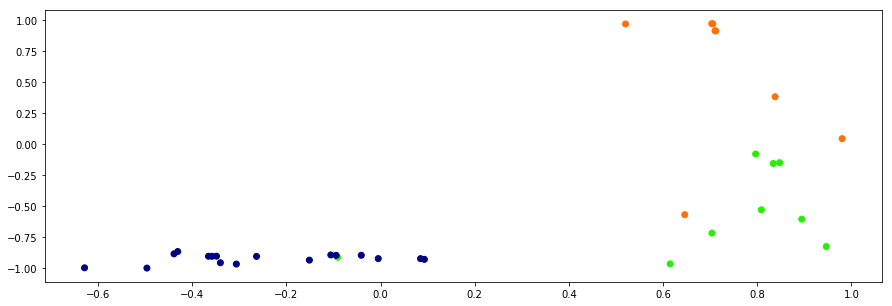

Predictions for the selected training nodes | real values: tensor([[0, 1, 2]]) | [0,1,2]
Number of correct predictions = 30
Epoch no: 7200


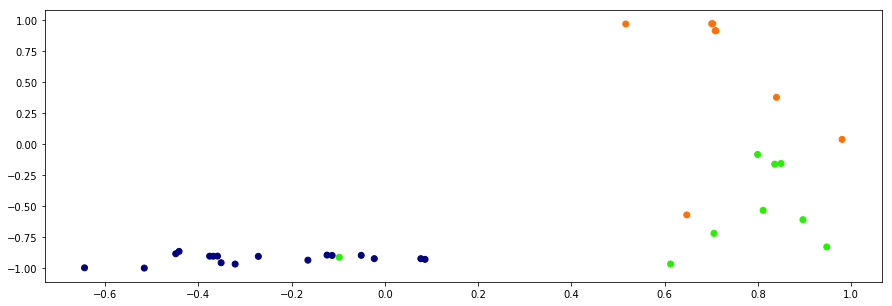

Predictions for the selected training nodes | real values: tensor([[0, 1, 2]]) | [0,1,2]
Number of correct predictions = 30
Epoch no: 7400


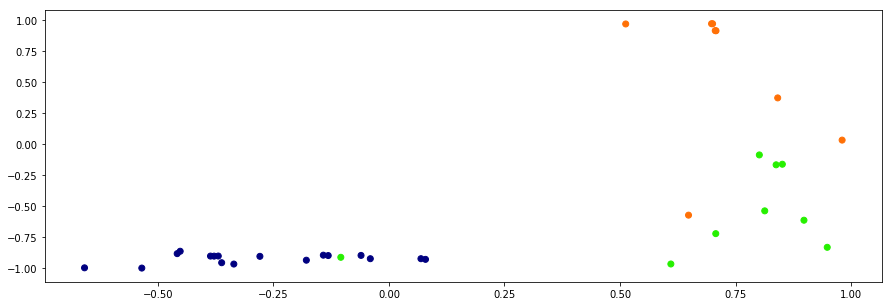

Predictions for the selected training nodes | real values: tensor([[0, 1, 2]]) | [0,1,2]
Number of correct predictions = 30
Epoch no: 7600


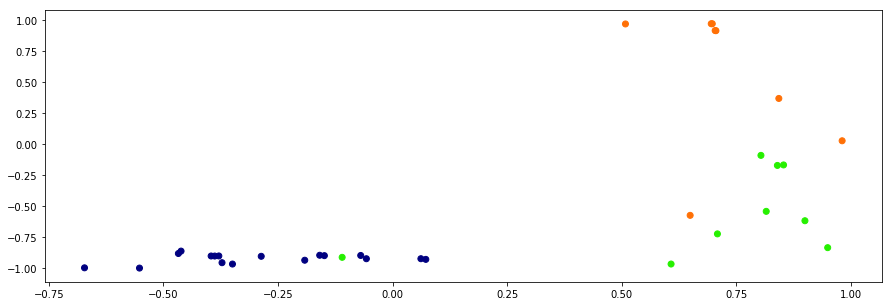

Predictions for the selected training nodes | real values: tensor([[0, 1, 2]]) | [0,1,2]
Number of correct predictions = 30
Epoch no: 7800


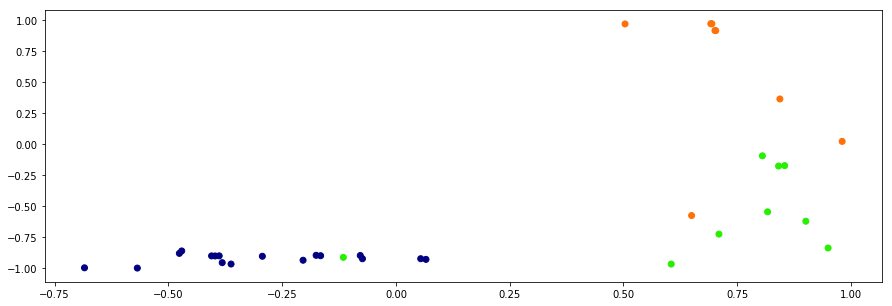

Predictions for the selected training nodes | real values: tensor([[0, 1, 2]]) | [0,1,2]
Number of correct predictions = 30
Epoch no: 8000


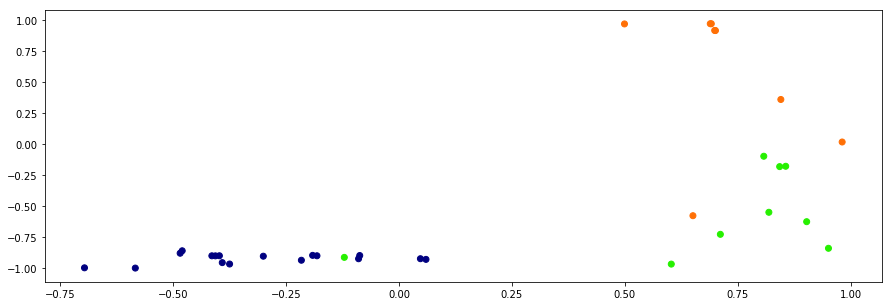

Predictions for the selected training nodes | real values: tensor([[0, 1, 2]]) | [0,1,2]
Number of correct predictions = 30
Epoch no: 8200


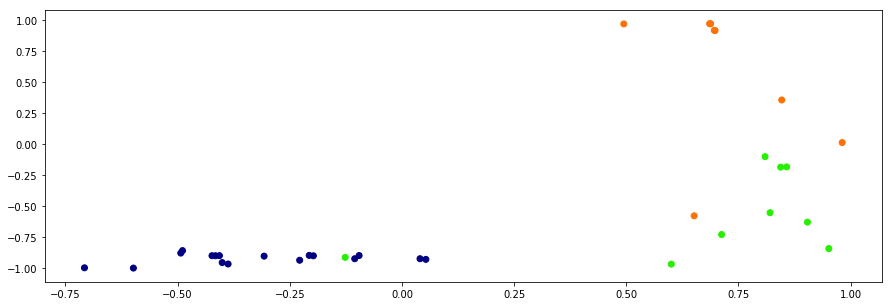

Predictions for the selected training nodes | real values: tensor([[0, 1, 2]]) | [0,1,2]
Number of correct predictions = 30
Epoch no: 8400


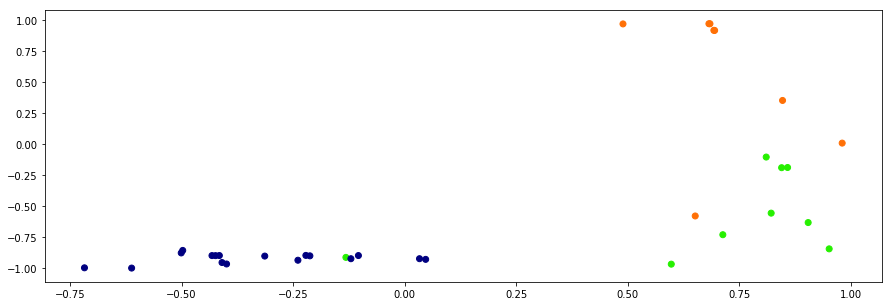

Predictions for the selected training nodes | real values: tensor([[0, 1, 2]]) | [0,1,2]
Number of correct predictions = 30
Epoch no: 8600


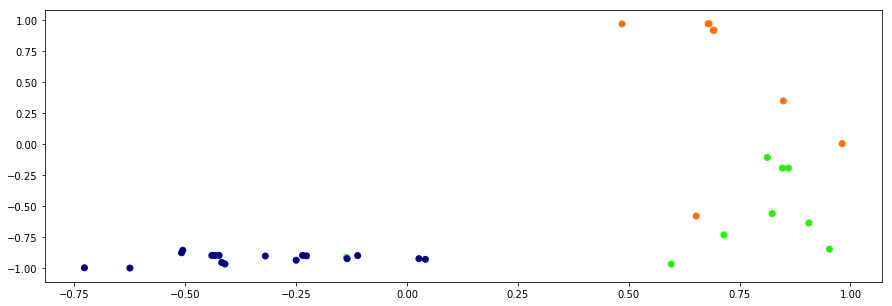

Predictions for the selected training nodes | real values: tensor([[0, 1, 2]]) | [0,1,2]
Number of correct predictions = 30
Epoch no: 8800


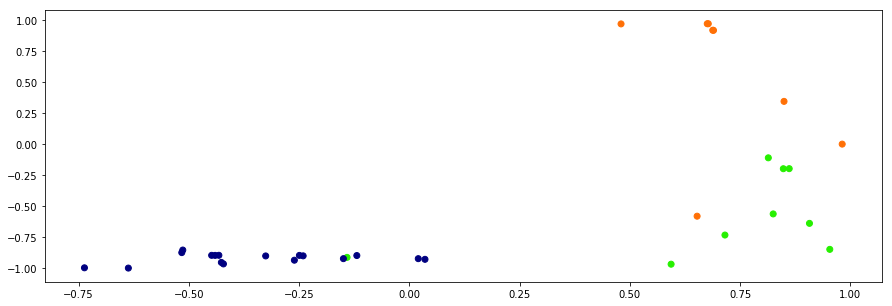

Predictions for the selected training nodes | real values: tensor([[0, 1, 2]]) | [0,1,2]
Number of correct predictions = 30
Epoch no: 9000


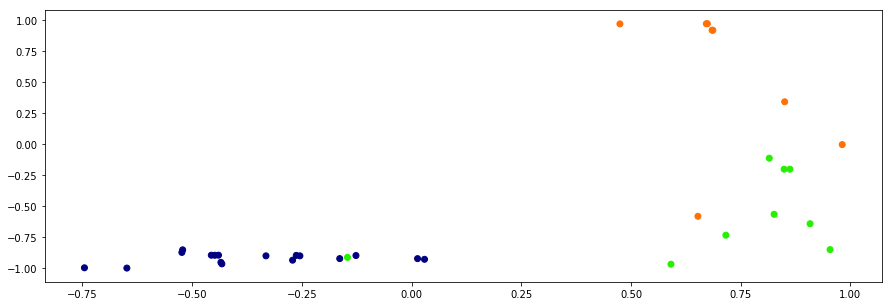

Predictions for the selected training nodes | real values: tensor([[0, 1, 2]]) | [0,1,2]
Number of correct predictions = 30
Epoch no: 9200


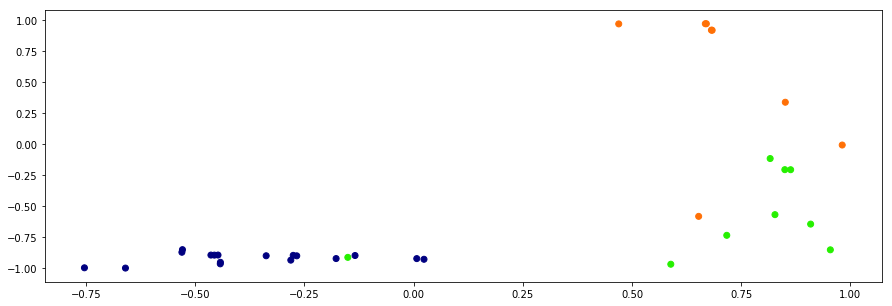

Predictions for the selected training nodes | real values: tensor([[0, 1, 2]]) | [0,1,2]
Number of correct predictions = 30
Epoch no: 9400


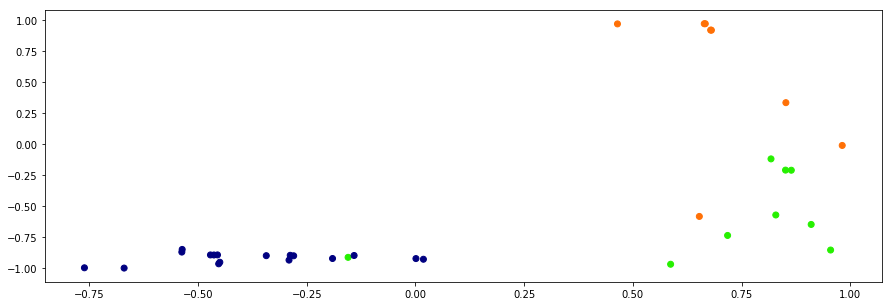

Predictions for the selected training nodes | real values: tensor([[0, 1, 2]]) | [0,1,2]
Number of correct predictions = 30
Epoch no: 9600


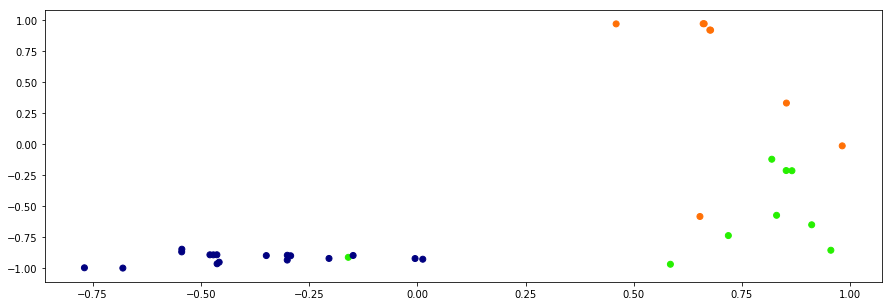

Predictions for the selected training nodes | real values: tensor([[0, 1, 2]]) | [0,1,2]
Number of correct predictions = 30
Epoch no: 9800


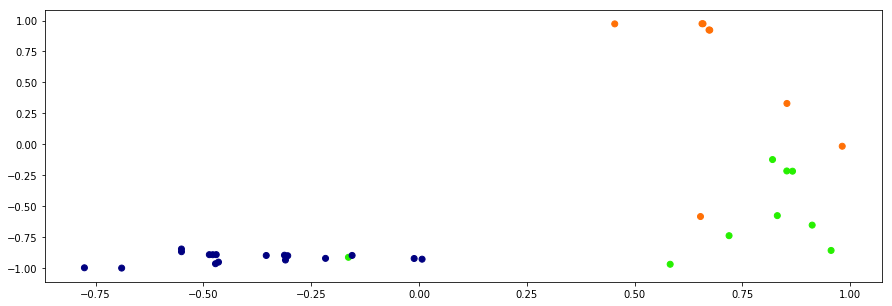

Predictions for the selected training nodes | real values: tensor([[0, 1, 2]]) | [0,1,2]
Number of correct predictions = 30


In [13]:
model = gcn_4(adjacency_matrix)
optimizer = torch.optim.SGD(model.parameters(),lr=0.01)
loss_fn = nn.CrossEntropyLoss()

total_loss = 0
epochs = 10000

data = np.zeros((1, 3))
n_correct_pred_max = 0
n_correct_supervised = 0
epoch_max = 0

for epoch in range(epochs):
    
    model.zero_grad()

    
    #y_pred_sel_nodes and y_pred have dimensions (batch_size, N_nodes, N_classes) 
    y_pred, output_2D_embedding = model(X)    
    y_pred_sel_nodes = y_pred[0, y_arg_rand].unsqueeze(0)
    
    
    loss_all_nodes = loss_fn(, )
    loss = loss_fn(y_pred_sel_nodes, y_rand_nodes)
    loss_value = loss.item()
    total_loss += loss_value 
    
    n_correct_pred = torch.sum(y==torch.argmax(y_pred, dim=2)[0]).item()
    if(n_correct_pred > n_correct_pred_max):
        n_correct_pred_max = n_correct_pred
        epoch_max = epoch
        n_correct_supervised = torch.sum(y_rand_nodes==torch.argmax(y_pred_sel_nodes, dim=2)[0]).item()
        best_output = y_pred
        
    if(epoch%200==0):
        print('Epoch no:', epoch)
        plot_embeddings_2D(output_2D_embedding)
        print('Predictions for the selected training nodes | real values:', torch.argmax(y_pred_sel_nodes, dim=1), '| [0,1,2]')
        print('Number of correct predictions =', n_correct_pred)
        
  
        
    
    loss.backward()        
    optimizer.step()

data[0, 0] = int(n_correct_pred_max)
data[0, 1] = int(n_correct_supervised)
data[0, 2] = int(epoch_max)



3D embedding of the model corresponding to the epoch with the better classification accuracy:

Node set: 15, 7, 16


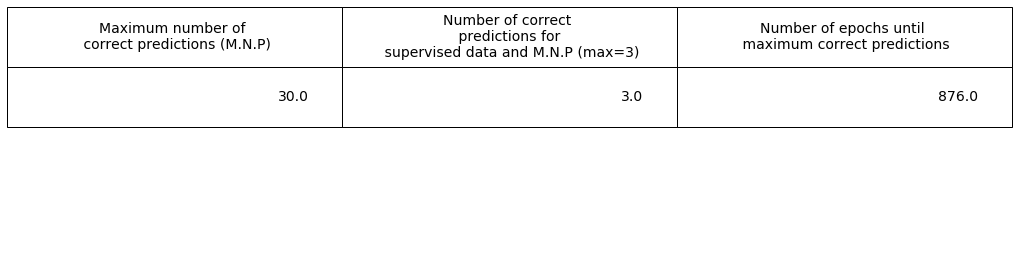

In [19]:
def draw_table(data, node_set):
    print('Node set:', node_set)
    fig, axs =plt.subplots(2,1)
    collabel=("Maximum number of \n correct predictions (M.N.P)", "Number of correct \n predictions for \n supervised data and M.N.P (max=3)", 
              "Number of epochs until \n maximum correct predictions")

  
    axs[0].axis('tight')
    axs[0].axis('off')
    axs[1].axis('off')
    

    the_table = axs[0].table(cellText=data,colLabels=collabel, loc='center')
    
    the_table.scale(3,5)
    the_table.auto_set_font_size(False)
    the_table.set_fontsize(14)


    plt.show()


draw_table(data, node_set)